# Data Cleaning

#### Tasks Completed
* Examine the dataset to understand its structure, including columns, data types, and formats. Identify missing values or inconsistencies.
* Evaluate the quality of the dataset by identifying errors, duplicates, and outliers. Assess completeness and consistency.
* Determine the relevance of the data by mapping dataset attributes to project objectives. Highlight irrelevant or redundant data points.
* Summarize key findings from the structure, quality, and relevance analysis. Prepare actionable insights to guide the project.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:

data = pd.read_excel('../../Data/transaction.xlsx')
data.head()

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,18909018,1704068735,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,36.593837,Sell To Uniswap
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,104.984275,0x415565b0
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.079035,0x415565b0
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,104.984275,0x415565b0
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,18909149,1704070319,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,10.247435,0x415565b0


In [3]:
data.shape


(19836, 8)

In [4]:
data.columns

Index(['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)',
       'From', 'To', 'Quantity', 'Method'],
      dtype='object')

In [5]:
data.dtypes

Transaction Hash            object
Blockno                      int64
UnixTimestamp                int64
DateTime (UTC)      datetime64[ns]
From                        object
To                          object
Quantity                   float64
Method                      object
dtype: object

In [6]:
data.describe()

,Blockno,UnixTimestamp,Quantity
count,1.983600e+04,1.983600e+04,19836.000000
mean,1.968441e+07,1.713463e+09,377.944387
std,3.220605e+05,3.898956e+06,8007.345063
min,1.890902e+07,1.704069e+09,0.000000
25%,1.946597e+07,1.710817e+09,3.213580
50%,1.973666e+07,1.714100e+09,72.444861
75%,1.993754e+07,1.716527e+09,293.678666
max,2.017186e+07,1.719357e+09,750000.000000


In [7]:
data.isnull().sum()

Transaction Hash    0
Blockno             0
UnixTimestamp       0
DateTime (UTC)      0
From                0
To                  0
Quantity            0
Method              0
dtype: int64

In [8]:
data['Transaction Hash'].unique()

array(['0x27797428fc8aaf088cc707c8788b5d13580696418c79190eda04823ab70d7eb7',
       '0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e8336290b7272ba73bc51',
       '0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9ccbd7d24e2a8b90c294c05',
       ...,
       '0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef013e6064df58a432b343',
       '0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d76442e9373f8a5422fc2452',
       '0x37dfd226ef55d464641ec94fc675ad3692d9af34713215816420b4556a7f8b0a'],
      dtype=object)

In [9]:
data['Transaction Hash'].value_counts()

0x630d72d417c6da379ffc6acf3688fcce84792e4a93d6fea8e1ce70ee202088f3    15
0x0d9678769f1943a9f81c7e50f690bfbd797bdfe1624dc94d8a15f513c91f75f0    12
0x705092688310291813c1057081c022dfdb54825a408bece4e773d591f288cf36    11
0xbff846f99284bed5bdac6a318c0ee2ef5da22a9c321aa8b7f44c4a02431fdf24    11
0x377e726d31cf8e60584cea5b9fb79720ff3dff87ae4413afcb5c8f17269f72b0    11
                                                                      ..
0x5d712a4cad451b5826e5952d4eec8be34b65bf201c02e3e8fcbbd877caa7ddb4     1
0x1937aaea921b1b8f74ab69c9b14006aa0c50e6d89cea649d81f74a4ad20ba9a2     1
0x7c3d6c737193b7dd1473aeb59e5a89f3ea367a04a4b22ea939738e3bb369cd07     1
0x76ea380c6b373829cea031c4bd5d34948beabb7903307e9eb257bd8f9763c54d     1
0x27797428fc8aaf088cc707c8788b5d13580696418c79190eda04823ab70d7eb7     1
Name: Transaction Hash, Length: 9787, dtype: int64

                Blockno  UnixTimestamp  Quantity
Blockno        1.000000       0.999999  0.005760
UnixTimestamp  0.999999       1.000000  0.005759
Quantity       0.005760       0.005759  1.000000


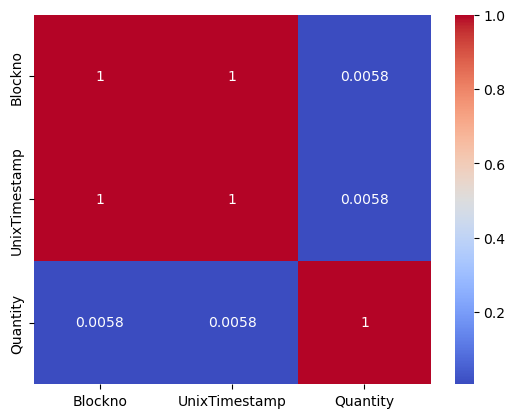

In [10]:
# Select only numerical columns for correlation calculation
numerical_data = data.select_dtypes(include=['number'])
correlation_matrix = numerical_data.corr()

# Display the correlation matrix
print(correlation_matrix)

# Optionally, visualize the correlation matrix using a heatmap
import seaborn as sns
import matplotlib.pyplot as plt

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.show()

In [11]:
data.sort_values(by='UnixTimestamp')

,Transaction Hash,Blockno,UnixTimestamp,DateTime (UTC),From,To,Quantity,Method
0,0x27797428fc8aaf088cc707c8788b5d13580696418c79...,18909018,1704068735,2024-01-01 00:25:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0x776a0725094cbf984e31b43d17e8aaec3c88294a,36.593837,Sell To Uniswap
1,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,104.984275,0x415565b0
2,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.079035,0x415565b0
3,0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...,18909070,1704069371,2024-01-01 00:36:11,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,0xd98d9d8c5a70df5d5d8e39847ce254347a59816b,104.984275,0x415565b0
4,0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...,18909149,1704070319,2024-01-01 00:51:59,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x22f9dcf4647084d6c31b2765f6910cd85c178c18,10.247435,0x415565b0
...,...,...,...,...,...,...,...,...
19828,0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef...,20171628,1719353855,2024-06-25 22:17:35,0x983dfba1c0724786598af0e63a9a6f94aabd24a1,0x95c4f5b83aa70810d4f142d58e5f7242bd891cb0,0.061537,0x415565b0
19833,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0xe4b7538c2e2bc683a3e84ea67aded2dff6c8cef5,0x28104d4f703ee5b5011cefe106f54efd56f33f95,1198.366157,Swap Compact
19834,0x37dfd226ef55d464641ec94fc675ad3692d9af347132...,20171862,1719356675,2024-06-25 23:04:35,0x28104d4f703ee5b5011cefe106f54efd56f33f95,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,706.115108,Swap Compact
19832,0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...,20171862,1719356675,2024-06-25 23:04:35,0x6469b34a2a4723163c4902dbbdea728d20693c12,0xee8aaa362a75fbf8e0a38a50ddc27f38551e16ea,81.711825,-


<AxesSubplot:>

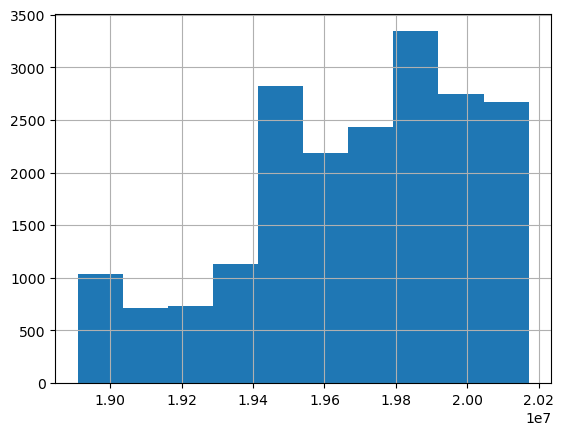

In [12]:
data['Blockno'].hist()

<AxesSubplot:xlabel='UnixTimestamp'>

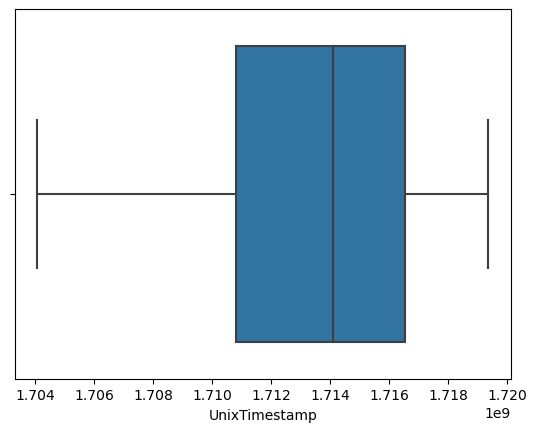

In [13]:
sns.boxplot(data=data,x='UnixTimestamp')

<AxesSubplot:>

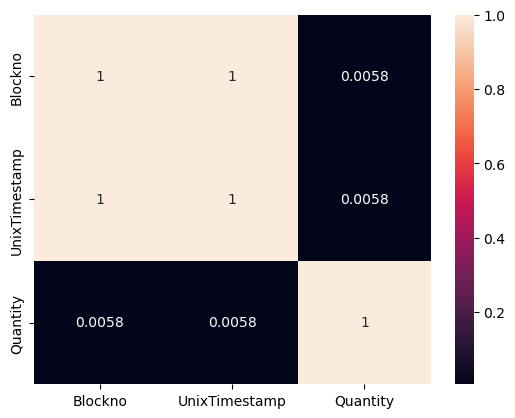

In [14]:
sns.heatmap(data.select_dtypes(include=['number']).corr(),annot=True)

In [15]:
# Step 2: Preliminary Data Overview
print("Initial Dataset Overview:")
print(data.info())
print("\nSample Rows:")
print(data.head())


Initial Dataset Overview:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 19836 entries, 0 to 19835
Data columns (total 8 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   Transaction Hash  19836 non-null  object        
 1   Blockno           19836 non-null  int64         
 2   UnixTimestamp     19836 non-null  int64         
 3   DateTime (UTC)    19836 non-null  datetime64[ns]
 4   From              19836 non-null  object        
 5   To                19836 non-null  object        
 6   Quantity          19836 non-null  float64       
 7   Method            19836 non-null  object        
dtypes: datetime64[ns](1), float64(1), int64(2), object(4)
memory usage: 1.2+ MB
None

Sample Rows:
                                    Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070  

In [18]:
# Check for duplicates in the entire DataFrame
duplicates = data[data.duplicated()]
# Print the number of duplicate rows
print("Number of duplicate rows:", duplicates.shape[0])
data = data.drop_duplicates()

Number of duplicate rows: 7


In [19]:
# Removing duplicates
data = data.drop_duplicates()

In [20]:
# Step 3: Check for Relevance (Assume objectives provided as a list of relevant columns)
project_objectives = ['Relevant_Column1', 'Relevant_Column2']  # Replace with actual objectives
all_columns = data.columns.tolist()

In [21]:
# Find irrelevant/redundant columns
irrelevant_columns = [col for col in all_columns if col not in project_objectives]
redundant_columns = [col for col in data.columns if data[col].nunique() == 1]
print("\nIrrelevant Columns:", irrelevant_columns)
print("Redundant Columns:", redundant_columns)
# Drop irrelevant/redundant columns (optional)
data_cleaned = data.drop(columns=irrelevant_columns + redundant_columns, errors='ignore')




Irrelevant Columns: ['Transaction Hash', 'Blockno', 'UnixTimestamp', 'DateTime (UTC)', 'From', 'To', 'Quantity', 'Method']
Redundant Columns: []


In [22]:
# Step 4: Missing Values Analysis
missing_data_summary = data_cleaned.isnull().sum()
missing_data_rows = data_cleaned.isnull().any(axis=1).sum()

print("\nMissing Data Summary (per column):")
print(missing_data_summary)
print(f"Total Rows with Missing Data: {missing_data_rows}")


Missing Data Summary (per column):
Series([], dtype: float64)
Total Rows with Missing Data: 0


In [23]:
# Step 5: Assess Impact (qualitative decision based on project objectives)
critical_columns = [col for col in project_objectives if col in data_cleaned.columns and data_cleaned[col].isnull().any()]

print("\nCritical Columns with Missing Data:", critical_columns)



Critical Columns with Missing Data: []


# Outlier Detection

#### Tasks Completed
* Perform an analysis to locate missing values in the dataset, identifying affected columns, rows, and patterns (e.g., random or systematic).
* Assess the impact of missing data on the dataset's structure and relevance. Determine whether the missing data is critical to the project's objectives.
* Implement appropriate methods to address missing data, such as mean/median imputation, interpolation, or dropping affected records. Document chosen techniques.
* Validate the dataset after handling missing values to ensure completeness and consistency. Cross-check for any residual issues.
* Validate Distribution Plots

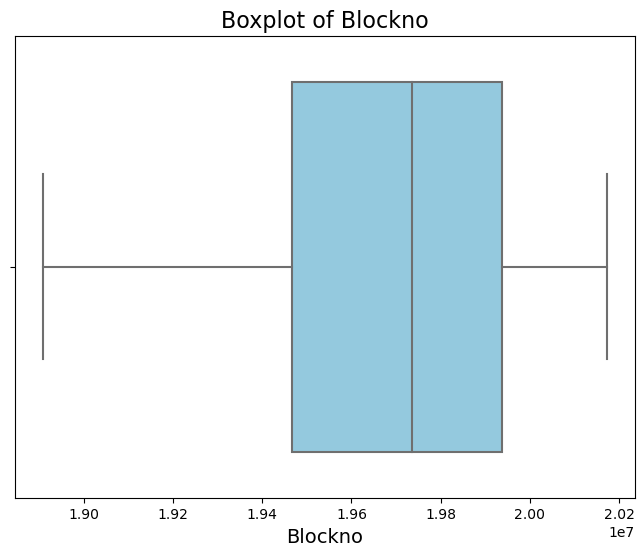

C:\Users\roopadharshini\AppData\Local\Temp\ipykernel_3416\533678280.py:43: UserWarning: Attempting to set identical left == right == 42 results in singular transformations; automatically expanding.
  plt.xlim(from_min, from_max)
C:\Users\roopadharshini\AppData\Local\Temp\ipykernel_3416\533678280.py:53: UserWarning: Attempting to set identical left == right == 42 results in singular transformations; automatically expanding.
  plt.xlim(to_min, to_max)


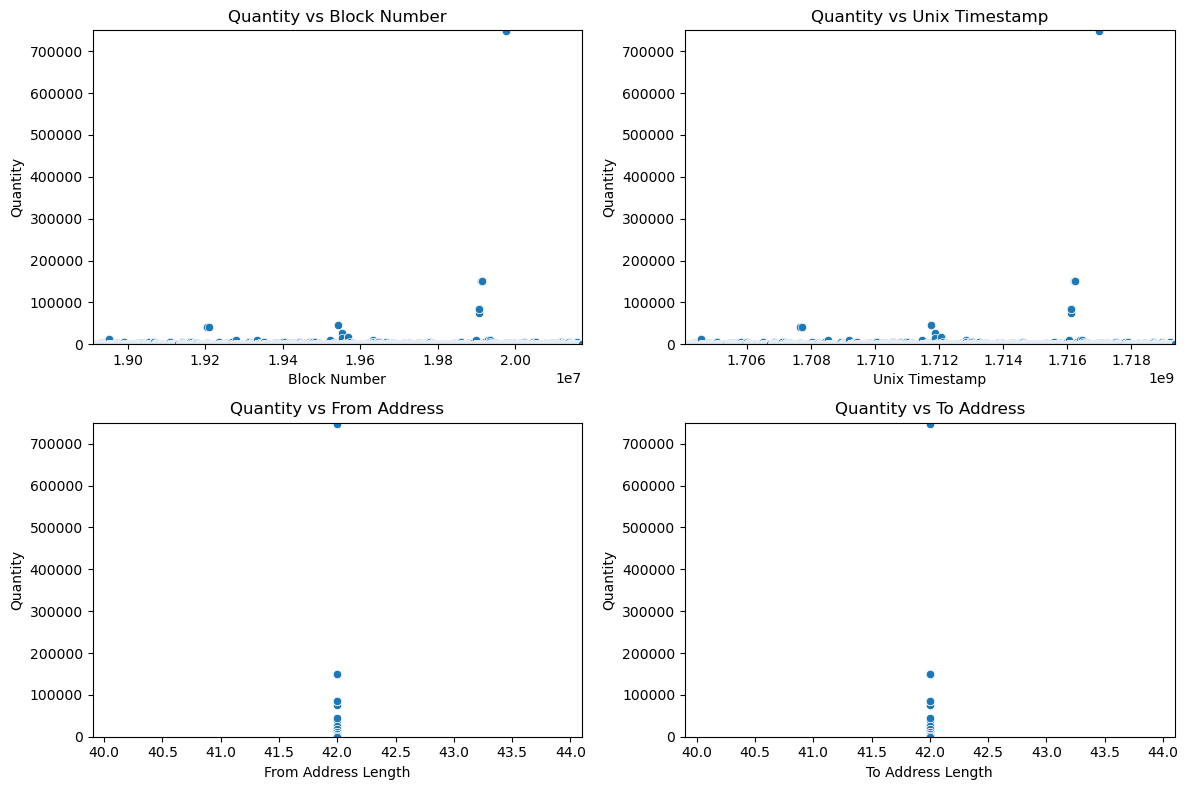

In [24]:
plt.figure(figsize=(8, 6))
sns.boxplot(x=data['Blockno'], color='skyblue')  # Changed 'df' to 'data'
plt.title('Boxplot of Blockno', fontsize=16)
plt.xlabel('Blockno', fontsize=14)
plt.show()
# Analyze the range of values in the dataset to set appropriate limits for visualization
quantity_min, quantity_max = data['Quantity'].min(), data['Quantity'].max()  # Changed 'df' to 'data'
blockno_min, blockno_max = data['Blockno'].min(), data['Blockno'].max()  # Changed 'df' to 'data'

# Define reasonable limits to improve the visualization
quantity_range = (quantity_min, quantity_max)
blockno_range = (blockno_min, blockno_max)

# Adjust scatterplots using appropriate limits
plt.figure(figsize=(12, 8))

# Scatterplot: Quantity vs Blockno
plt.subplot(2, 2, 1)
sns.scatterplot(x='Blockno', y='Quantity', data=data)  # Changed 'df' to 'data'
plt.title('Quantity vs Block Number')
plt.xlabel('Block Number')
plt.ylabel('Quantity')
plt.xlim(blockno_range)
plt.ylim(quantity_range)

# Scatterplot: Quantity vs UnixTimestamp
timestamp_min, timestamp_max = data['UnixTimestamp'].min(), data['UnixTimestamp'].max()  # Changed 'df' to 'data'
plt.subplot(2, 2, 2)
sns.scatterplot(x='UnixTimestamp', y='Quantity', data=data)  # Changed 'df' to 'data'
plt.title('Quantity vs Unix Timestamp')
plt.xlabel('Unix Timestamp')
plt.ylabel('Quantity')
plt.xlim(timestamp_min, timestamp_max)
plt.ylim(quantity_range)

# Scatterplot: Quantity vs From
from_min, from_max = data['From'].str.len().min(), data['From'].str.len().max()  # Example of numeric encoding # Changed 'df' to 'data'
plt.subplot(2, 2, 3)
sns.scatterplot(x=data['From'].str.len(), y='Quantity', data=data)  # Changed 'df' to 'data'
plt.title('Quantity vs From Address')
plt.xlabel('From Address Length')
plt.ylabel('Quantity')
plt.xlim(from_min, from_max)
plt.ylim(quantity_range)

# Scatterplot: Quantity vs To
to_min, to_max = data['To'].str.len().min(), data['To'].str.len().max()  # Changed 'df' to 'data'
plt.subplot(2, 2, 4)
sns.scatterplot(x=data['To'].str.len(), y='Quantity', data=data)  # Changed 'df' to 'data'
plt.title('Quantity vs To Address')
plt.xlabel('To Address Length')
plt.ylabel('Quantity')
plt.xlim(to_min, to_max)
plt.ylim(quantity_range)

plt.tight_layout()
plt.show()

In [25]:
# Document chosen methods
print("\nImputation Completed: Numerical (Mean), Categorical (Mode)")



Imputation Completed: Numerical (Mean), Categorical (Mode)


In [26]:
# Step 7: Validate Dataset
print("\nPost-Cleanup Validation:")
print(data_cleaned.info())



Post-Cleanup Validation:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 19829 entries, 0 to 19835
Empty DataFrameNone


In [27]:
import os

# Save the cleaned dataset
cleaned_file_path = '/mnt/data/trans_cleaned.xlsx'

# Create the directory if it doesn't exist
os.makedirs(os.path.dirname(cleaned_file_path), exist_ok=True)

data_cleaned.to_excel(cleaned_file_path, index=False)
print(f"Cleaned dataset saved to {cleaned_file_path}")

Cleaned dataset saved to /mnt/data/trans_cleaned.xlsx


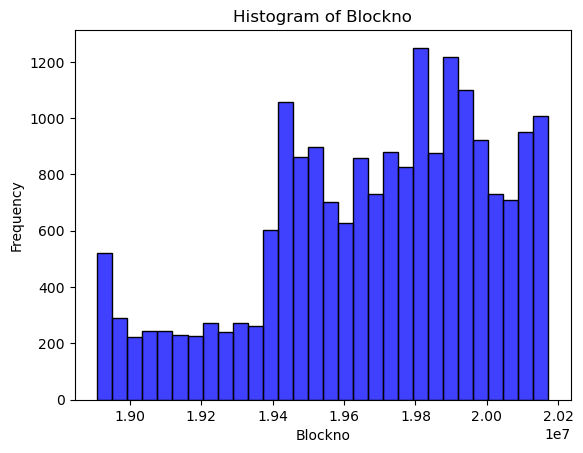

In [28]:
import seaborn as sns
import matplotlib.pyplot as plt # Make sure to import matplotlib.pyplot

# Assuming you want to use the original 'data' DataFrame if 'Blockno' was dropped:
sns.histplot(data['Blockno'], bins=30, kde=False, color='blue')

plt.title('Histogram of Blockno')
plt.xlabel('Blockno')
plt.ylabel('Frequency')
plt.show()

**Use statistical methods (e.g., Z-scores, IQR) or visualization techniques (e.g., box plots, scatter plots) to detect outliers in the dataset.**


In [29]:
numeric_column = 'Quantity'
values = data[numeric_column]


In [30]:
from scipy.stats import zscore

data['Z-Score'] = zscore(data[numeric_column])
z_threshold = 3  # Define a threshold
outliers_z = data[abs(data['Z-Score']) > z_threshold]
print("Outliers detected using Z-scores:")
print(outliers_z)


Outliers detected using Z-scores:
                                        Transaction Hash   Blockno  \
1976   0x09283e242a0b4d1b3740877246264b96606e45a68a88...  19203973   
2034   0x7cc9df3af3f99d48b57821c20d126f8e2581048eb50a...  19209187   
6498   0x71d25e3f21a3a283fdc27a62177222b1fcb488b4d936...  19542502   
6649   0x20c376dd3101e34cdd60a8faf1f102b67bf8548ecb18...  19552816   
14099  0x45a7c424ef493d00bad7a353405e623869183c3237ec...  19904889   
14108  0x582324c488320c47d0ca6f5dbeb52b61796255257873...  19905081   
14109  0xcd0040eff828478f5561af9258c8fe2512236bfdc2da...  19905097   
14110  0x4456a8565a49010beb06afee221c815e6cb2051f25aa...  19905105   
14238  0xe0a84030e852d0522a6e8a2fc2ac0f35ce307d22de3e...  19911647   
14239  0x88ee8181aba8d601d1972480b731b55a04b790befb67...  19911650   
14334  0xe231a20bc24f88cbe2eb1955544e561ab2eb978fbd62...  19914915   
14335  0xb8742b9fe11af2e8b8f3ea05bf1b877f27f3961cad38...  19914917   
14336  0x4d9a14049cd09835e1c52b099bfff56b274eb881f8af...

In [31]:
Q1 = values.quantile(0.25)
Q3 = values.quantile(0.75)
IQR = Q3 - Q1

lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers_iqr = data[(values < lower_bound) | (values > upper_bound)]
print("Outliers detected using IQR:")
print(outliers_iqr)


Outliers detected using IQR:
                                        Transaction Hash   Blockno  \
42     0x5746abd96e36c5b453e29b286ba7bdda0822e0227e94...  18914142   
48     0xaee54ba3c7462416f3ab76412a0f0dc2456492c5ffac...  18914652   
50     0xaee54ba3c7462416f3ab76412a0f0dc2456492c5ffac...  18914652   
76     0x1202d28ca9ef1cde927e4278cb3da6207dcc24f8d1d7...  18915600   
77     0x1202d28ca9ef1cde927e4278cb3da6207dcc24f8d1d7...  18915600   
...                                                  ...       ...   
19706  0x446a1117c5075dfb70c6b521d7a5b2e814efe8ea545c...  20163467   
19707  0x009ce1622470c4cd9f021619337cf4eae1b4ead7908f...  20163472   
19712  0x1c8444fab9247f19dd84255210d3cea05f9d09a184eb...  20164395   
19815  0x4a613ed0b5baae590ca416aa3f280167aa0ccf7b6b12...  20171387   
19833  0x37dfd226ef55d464641ec94fc675ad3692d9af347132...  20171862   

       UnixTimestamp      DateTime (UTC)  \
42        1704131003 2024-01-01 17:43:23   
48        1704137195 2024-01-01 19:26:35  

In [35]:
outliers_iqr.to_csv('../../Data/outliers_iqr.csv', index=False)





# **3. Exploratory Data Analysis**

* Analyze and visualize the total number of transactions over time (daily, weekly, or monthly) to identify patterns or trends.
* Examine the distribution of transaction quantities, including detecting skewness, peaks, and outliers. Create histograms or density plots to visualize this distribution.
* Rank transactions based on the highest quantities recorded in the dataset and use bar charts to visualize the contributors to transaction quantities.
* Analyze the distribution of different transaction methods and determine their relative usage frequencies. Create pie charts or bar plots to represent the data.
* Validate Correlation Analysis

In [1]:
import pandas as pd

# Load the dataset
df = pd.read_excel('../../Data/transaction.xlsx')

# Overview of data
print("Shape of dataset:", df.shape)
print("\nFirst few rows:")
print(df.head())

# Data structure and summary
print("\nData info:")
df.info()

print("\nSummary statistics for numerical columns:")
print(df.describe())
# Checking data types
print("\nData types of columns:")
print(df.dtypes)

Shape of dataset: (19836, 8)

First few rows:
                                    Transaction Hash   Blockno  UnixTimestamp  \
0  0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018     1704068735   
1  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
2  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
3  0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070     1704069371   
4  0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...  18909149     1704070319   

       DateTime (UTC)                                        From  \
0 2024-01-01 00:25:35  0x6469b34a2a4723163c4902dbbdea728d20693c12   
1 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
2 2024-01-01 00:36:11  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   
3 2024-01-01 00:36:11  0x22f9dcf4647084d6c31b2765f6910cd85c178c18   
4 2024-01-01 00:51:59  0x983dfba1c0724786598af0e63a9a6f94aabd24a1   

                                           To    Qua

In [2]:
# Unique values for categorical columns
for col in df.select_dtypes(include=['object']).columns:
    print(f"\nUnique values in {col}:")
    print(df[col].value_counts())
# Missing value count and percentage
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100
print("\nMissing values in each column:")
print(pd.DataFrame({'Missing Values': missing_values, 'Percentage': missing_percentage}))

# Impute missing values in actual numerical columns if needed.
# Example: replace 'Quantity' if it's a numerical column with missing values
df.fillna({
    'Quantity': df['Quantity'].mean(), # Replace 'Quantity' with your actual column name
    # 'categorical_column': 'Unknown'  # Example for categorical (Replace with actual column if needed)
}, inplace=True)


Unique values in Transaction Hash:
Transaction Hash
0x630d72d417c6da379ffc6acf3688fcce84792e4a93d6fea8e1ce70ee202088f3    15
0x0d9678769f1943a9f81c7e50f690bfbd797bdfe1624dc94d8a15f513c91f75f0    12
0x377e726d31cf8e60584cea5b9fb79720ff3dff87ae4413afcb5c8f17269f72b0    11
0xbff846f99284bed5bdac6a318c0ee2ef5da22a9c321aa8b7f44c4a02431fdf24    11
0x705092688310291813c1057081c022dfdb54825a408bece4e773d591f288cf36    11
                                                                      ..
0xa67d0d1bd5773bcc81ee7df6c906a465b7261c22aa8d89c0f08b71ab408b41ca     1
0x0bf1dd582c5c4c31148aa7e85c9ffa2190893ff6bdbe1943ffb7457997c4c6fe     1
0xf7dd4320d682977de25b9a14371838cacb4de3dd5ffbf3a542dbfc1ef6335427     1
0x02dfcfc71f0931fa94ac263311736fac57f5d13412803098a02b8983c0a15a44     1
0xbf40224581a3fe292c7ff589b3335f987fd35f2e4990bab4dc290057c80839dc     1
Name: count, Length: 9787, dtype: int64

Unique values in From:
From
0x983dfba1c0724786598af0e63a9a6f94aabd24a1    3575
0x6469b34a2a4723163c4902

In [3]:

# Drop columns with high percentage of missing values
df = df.dropna(axis=1, thresh=0.5 * len(df)) # Drop columns with >50% missing
# Removing duplicates
df = df.drop_duplicates()

# Handling outliers using IQR (example for numerical_column)
Q1 = df['Blockno'].quantile(0.25)
Q3 = df['Quantity'].quantile(0.75)
IQR = Q3 - Q1
df = df[(df['Blockno'] >= Q1 - 1.5 * IQR) & (df['Quantity'] <= Q3 + 1.5 * IQR)]
import seaborn as sns
import matplotlib.pyplot as plt

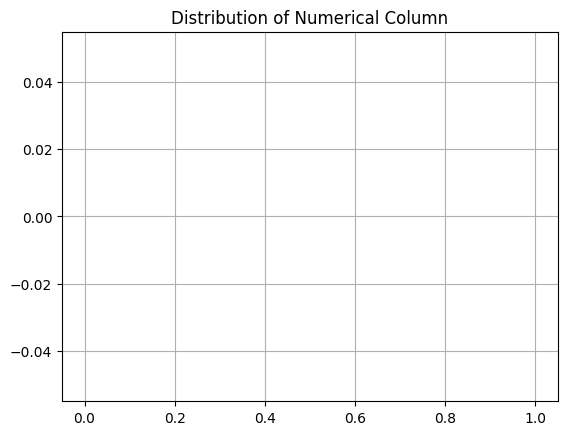

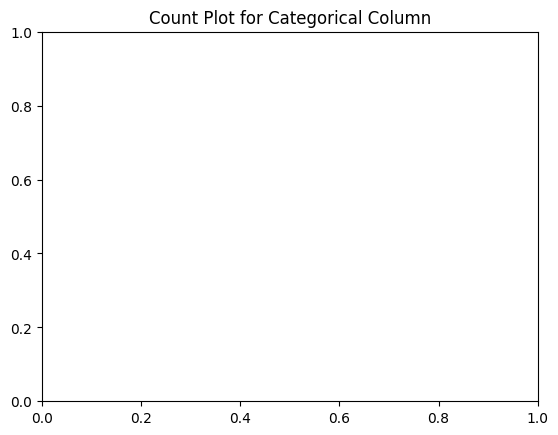

c:\Users\dwara\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:202: RuntimeWarning: All-NaN slice encountered
  vmin = np.nanmin(calc_data)
c:\Users\dwara\AppData\Local\Programs\Python\Python312\Lib\site-packages\seaborn\matrix.py:207: RuntimeWarning: All-NaN slice encountered
  vmax = np.nanmax(calc_data)


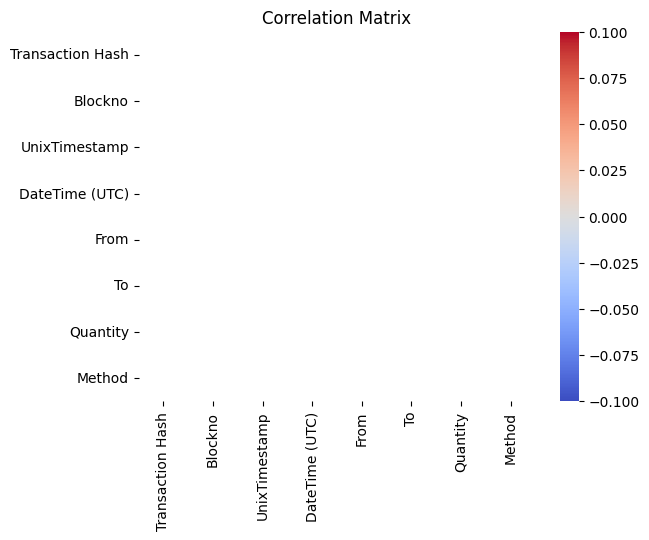

In [4]:
# Histogram for numerical data
df['Quantity'].hist(bins=20)
plt.title('Distribution of Numerical Column')
plt.show()

# Count plot for categorical data
sns.countplot(x='Quantity', data=df)
plt.title('Count Plot for Categorical Column')
plt.show()
# Correlation matrix
correlation_matrix = df.corr()
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

**bivariant analysis**





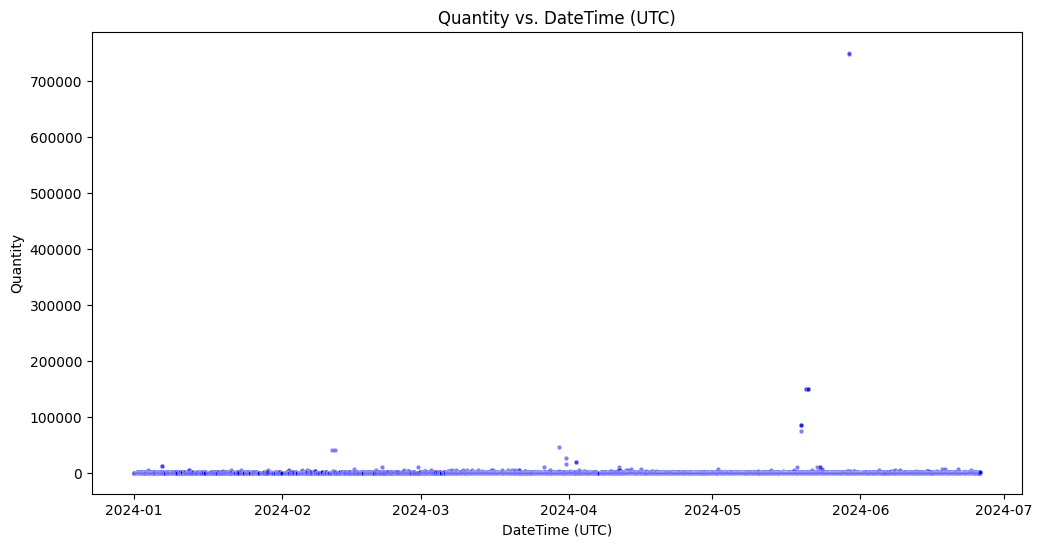

In [5]:
df = pd.read_excel('../../Data/transaction.xlsx')
plt.figure(figsize=(12, 6))
# Use 'df' instead of 'data'
sns.scatterplot(x=df['DateTime (UTC)'], y=df['Quantity'], alpha=0.5, c='blue', s=10) 
plt.title("Quantity vs. DateTime (UTC)")
plt.xlabel("DateTime (UTC)")
plt.ylabel("Quantity")
plt.show()

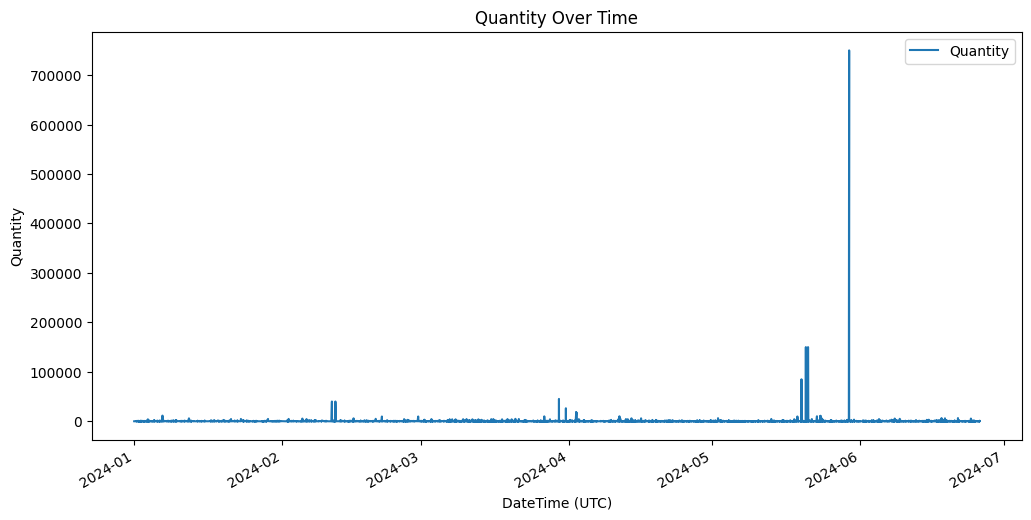

In [6]:

data = pd.read_excel('../../Data/transaction.xlsx')  # Define 'data' here

# Now you can use 'data' in the following code:
data.sort_values('DateTime (UTC)').plot(x='DateTime (UTC)', y='Quantity', kind='line', figsize=(12, 6))
plt.title('Quantity Over Time')
plt.xlabel('DateTime (UTC)')
plt.ylabel('Quantity')
plt.show()

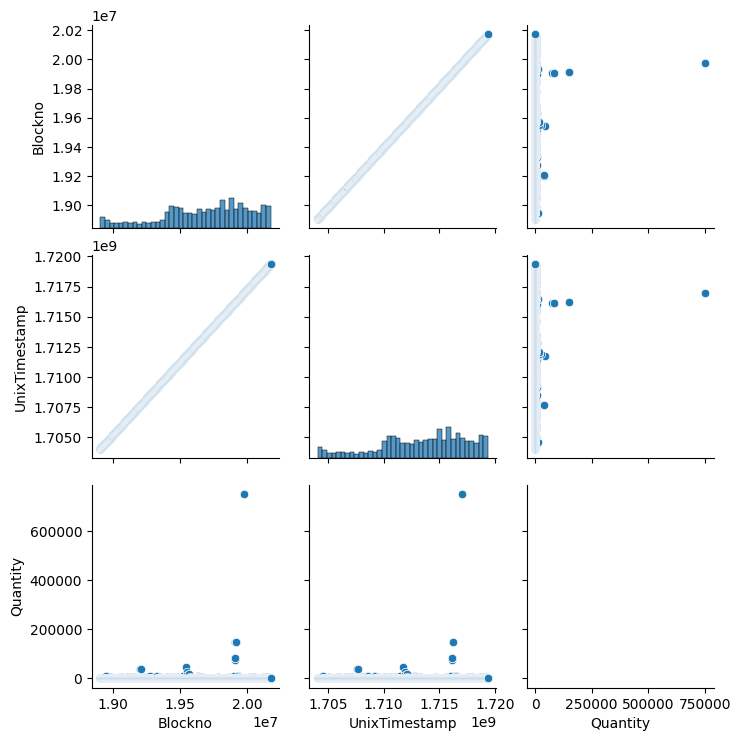

In [7]:
sns.pairplot(data[['Blockno', 'UnixTimestamp', 'Quantity']])
plt.show()

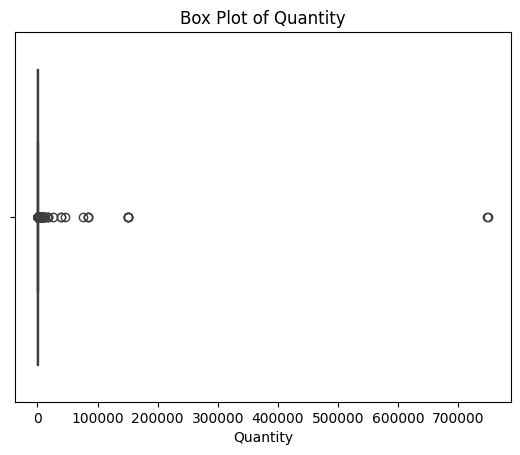

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt


numeric_column = 'Quantity'
values = data[numeric_column]

sns.boxplot(x=values)
plt.title("Box Plot of Quantity")
plt.show()

In [ ]:
# Calculate upper and lower bounds using IQR (make sure 'data' is your DataFrame)
Q1 = data[numeric_column].quantile(0.25)
Q3 = data[numeric_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

plt.scatter(data.index, values)
plt.axhline(y=upper_bound, color='r', linestyle='--', label='Upper Bound')
plt.axhline(y=lower_bound, color='b', linestyle='--', label='Lower Bound')
plt.title("Scatter Plot of Quantity with Outliers")
plt.legend()
plt.show()

**Assess the significance of identified outliers by analyzing their influence on data trends, averages, and other metrics.**

In [9]:
# Key metrics before removing outliers
mean_before = data['Quantity'].mean()
median_before = data['Quantity'].median()  # Corrected: 'data' instead of 'df'
std_before = data['Quantity'].std()  # Corrected: 'data' instead of 'df'

print(f"Mean (Before): {mean_before}")
print(f"Median (Before): {median_before}")
print(f"Std Dev (Before): {std_before}")

Mean (Before): 377.9443866655519
Median (Before): 72.44486142725997
Std Dev (Before): 8007.34506336469


In [10]:
# Using IQR to remove outliers
Q1 = data['Quantity'].quantile(0.25)
Q3 = data['Quantity'].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

filtered_data = data[(data['Quantity'] >= lower_bound) & (data['Quantity'] <= upper_bound)] # Changed 'df' to 'data'
print(filtered_data)

                                        Transaction Hash   Blockno  \
0      0x27797428fc8aaf088cc707c8788b5d13580696418c79...  18909018   
1      0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070   
2      0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070   
3      0x1fba1d9d11ef9986478f1d964e37f0d1a5abdbc0503e...  18909070   
4      0xb8e2f84b80260aa1c1e975e27a59086285e6616ca9cc...  18909149   
...                                                  ...       ...   
19830  0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef...  20171628   
19831  0xbd236aea3d8e798143581b8c941c301916ecdce2e6ef...  20171628   
19832  0xe6b3867b6a620644689ba43af59f3b3e0eade9c4d764...  20171862   
19834  0x37dfd226ef55d464641ec94fc675ad3692d9af347132...  20171862   
19835  0x37dfd226ef55d464641ec94fc675ad3692d9af347132...  20171862   

       UnixTimestamp      DateTime (UTC)  \
0         1704068735 2024-01-01 00:25:35   
1         1704069371 2024-01-01 00:36:11   
2         1704069371 2024-0

In [11]:
# Key metrics after removing outliers
mean_after = filtered_data['Quantity'].mean()
median_after = filtered_data['Quantity'].median()
std_after = filtered_data['Quantity'].std()

print(f"Mean (After): {mean_after}")
print(f"Median (After): {median_after}")
print(f"Std Dev (After): {std_after}")


Mean (After): 138.98905311045573
Median (After): 55.4585322723907
Std Dev (After): 184.96761688071885


In [12]:
outliers_only = data[(data['Quantity'] < lower_bound) | (data['Quantity'] > upper_bound)]  # Changed 'df' to 'data'
outlier_mean_contribution = outliers_only['Quantity'].sum() / data['Quantity'].sum()  # Changed 'df' to 'data'

print(f"Outlier Contribution to Total Quantity: {outlier_mean_contribution:.2%}")

Outlier Contribution to Total Quantity: 66.36%


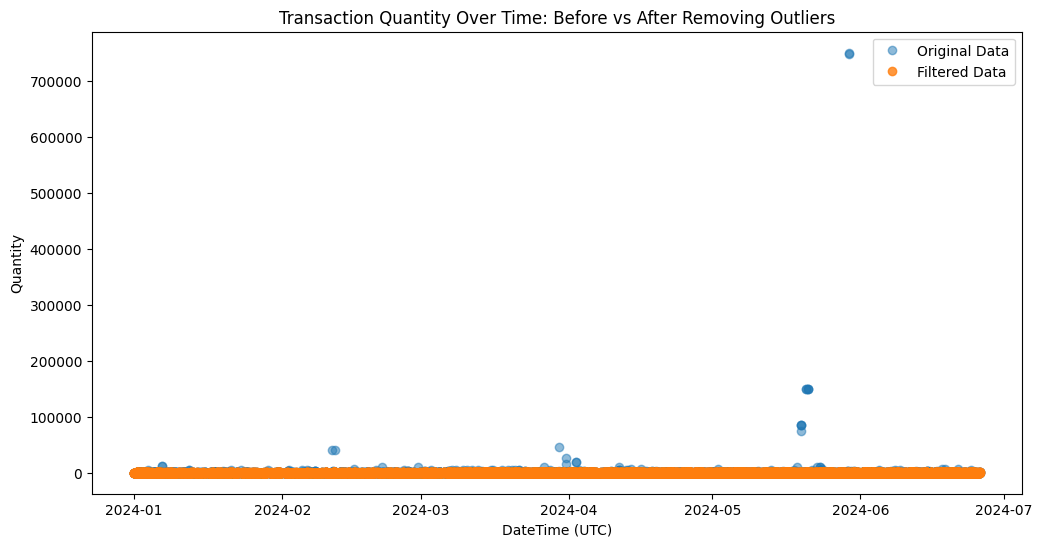

In [13]:
plt.figure(figsize=(12, 6))
plt.plot(data['DateTime (UTC)'], data['Quantity'], 'o', label='Original Data', alpha=0.5)  # Changed 'df' to 'data'
plt.plot(filtered_data['DateTime (UTC)'], filtered_data['Quantity'], 'o', label='Filtered Data', alpha=0.8)
plt.legend()
plt.title("Transaction Quantity Over Time: Before vs After Removing Outliers")
plt.xlabel("DateTime (UTC)")
plt.ylabel("Quantity")
plt.show()

In [14]:
# Optional: Save filtered data and outliers
filtered_data.to_csv('filtered_data.csv', index=False)
outliers_only.to_csv('outliers.csv', index=False)
print("Filtered data and outliers saved to CSV files.")

Filtered data and outliers saved to CSV files.


**Apply suitable strategies to manage outliers, such as transformation, capping, or removal, based on the project’s requirements. Document the methods used.**

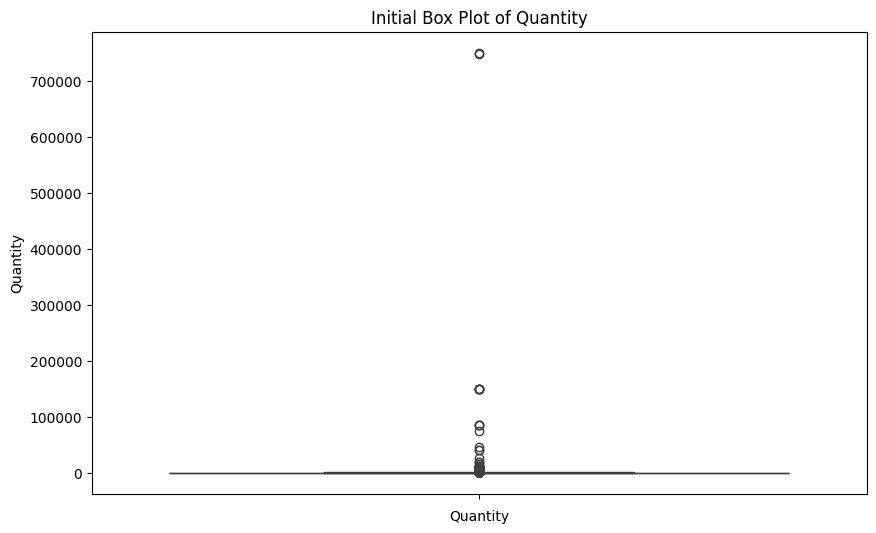

In [15]:
# Step 1: Visualize the Initial Data Distribution
plt.figure(figsize=(10, 6))
sns.boxplot(data[numeric_column])
plt.title("Initial Box Plot of Quantity")
plt.xlabel("Quantity")
plt.show()


In [16]:
# Step 2: Detect Outliers Using IQR
Q1 = data[numeric_column].quantile(0.25)
Q3 = data[numeric_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

outliers = data[(data[numeric_column] < lower_bound) | (data[numeric_column] > upper_bound)]
print(f"Number of Outliers Detected: {len(outliers)}")

Number of Outliers Detected: 1689


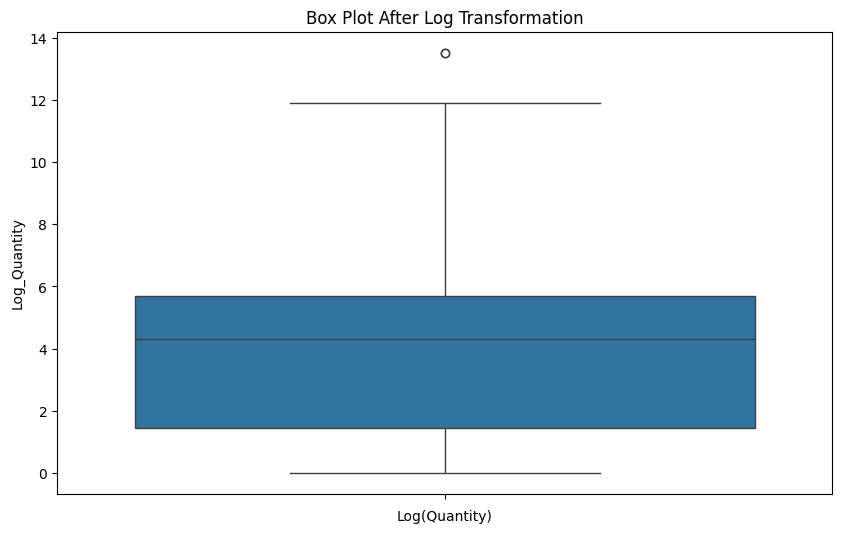

In [17]:
# Step 3: Outlier Management Strategies

# (A) Transformation: Apply a Log Transformation
import numpy as np  # Import numpy with alias np

data['Log_Quantity'] = np.log1p(data[numeric_column])  # log1p handles zero values
plt.figure(figsize=(10, 6))
sns.boxplot(data['Log_Quantity'])
plt.title("Box Plot After Log Transformation")
plt.xlabel("Log(Quantity)")
plt.show()

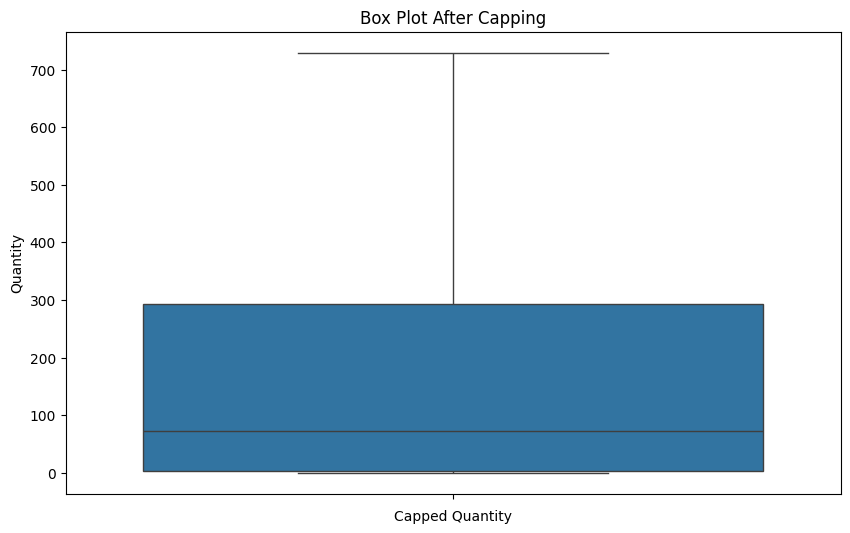

In [18]:
# (B) Capping: Replace Outliers with Bounds
capped_data = data.copy()
capped_data[numeric_column] = np.where(
    capped_data[numeric_column] < lower_bound, lower_bound,
    np.where(capped_data[numeric_column] > upper_bound, upper_bound, capped_data[numeric_column])
)

plt.figure(figsize=(10, 6))
sns.boxplot(capped_data[numeric_column])
plt.title("Box Plot After Capping")
plt.xlabel("Capped Quantity")
plt.show()


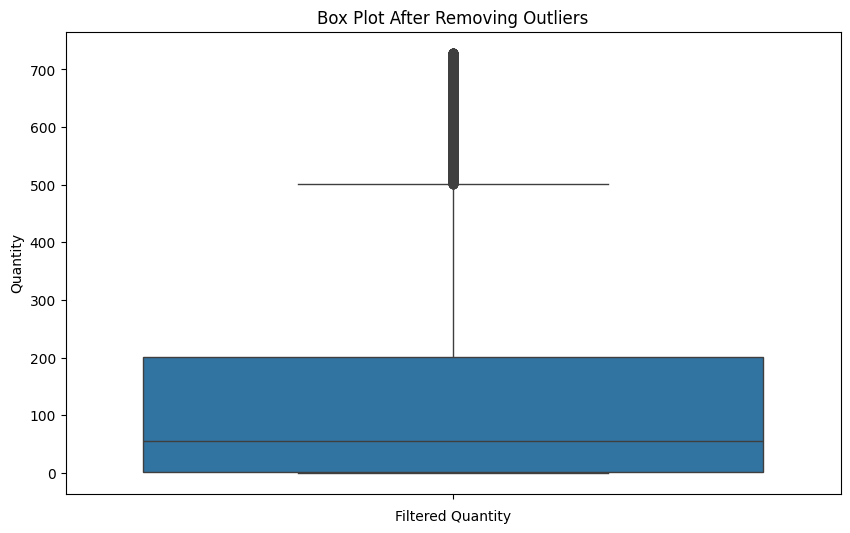

In [19]:
# (C) Removal: Remove Outliers from the Dataset
filtered_data = data[(data[numeric_column] >= lower_bound) & (data[numeric_column] <= upper_bound)]

plt.figure(figsize=(10, 6))
sns.boxplot(filtered_data[numeric_column])
plt.title("Box Plot After Removing Outliers")
plt.xlabel("Filtered Quantity")
plt.show()

In [20]:
# Step 4: Compare the Impact of Each Strategy
print("\nComparison of Metrics After Applying Each Strategy:")
print("Original Data:")
print(f"Mean: {data[numeric_column].mean()}, Std Dev: {data[numeric_column].std()}")

print("\nLog Transformation:")
print(f"Mean: {data['Log_Quantity'].mean()}, Std Dev: {data['Log_Quantity'].std()}")

print("\nCapped Data:")
print(f"Mean: {capped_data[numeric_column].mean()}, Std Dev: {capped_data[numeric_column].std()}")

print("\nFiltered Data:")
print(f"Mean: {filtered_data[numeric_column].mean()}, Std Dev: {filtered_data[numeric_column].std()}")

# Step 5: Save Processed Data
filtered_data.to_csv('filtered_data.csv', index=False)
capped_data.to_csv('capped_data.csv', index=False)
data[['DateTime (UTC)', 'Log_Quantity']].to_csv('log_transformed_data.csv', index=False)

print("\nProcessed datasets saved as 'filtered_data.csv', 'capped_data.csv', and 'log_transformed_data.csv'.")


Comparison of Metrics After Applying Each Strategy:
Original Data:
Mean: 377.9443866655519, Std Dev: 8007.34506336469

Log Transformation:
Mean: 3.7532217529419007, Std Dev: 2.335269134169242

Capped Data:
Mean: 189.25947302221354, Std Dev: 241.77047618422742

Filtered Data:
Mean: 138.98905311045573, Std Dev: 184.96761688071885

Processed datasets saved as 'filtered_data.csv', 'capped_data.csv', and 'log_transformed_data.csv'.


In [21]:
# Step 1: Recalculate Metrics After Each Strategy
def calculate_metrics(dataset, column_name):
    mean = dataset[column_name].mean()
    median = dataset[column_name].median()
    std_dev = dataset[column_name].std()
    return mean, median, std_dev

# Import numpy with alias np
import numpy as np

# Apply Outlier Management Methods
# (A) Log Transformation
data['Log_Quantity'] = np.log1p(data[numeric_column])  # Log transformation

In [22]:
# (B) Capping
Q1 = data[numeric_column].quantile(0.25)
Q3 = data[numeric_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR

capped_data = data.copy()
capped_data[numeric_column] = np.where(
    capped_data[numeric_column] < lower_bound, lower_bound,
    np.where(capped_data[numeric_column] > upper_bound, upper_bound, capped_data[numeric_column])
)


In [23]:
# (C) Removal
filtered_data = data[(data[numeric_column] >= lower_bound) & (data[numeric_column] <= upper_bound)]

# Step 2: Verify Metrics After Outlier Management
original_metrics = calculate_metrics(data, numeric_column)
log_metrics = calculate_metrics(data, 'Log_Quantity')
capped_metrics = calculate_metrics(capped_data, numeric_column)
filtered_metrics = calculate_metrics(filtered_data, numeric_column)


In [24]:
# Summarize Findings
print("\nSummary of Metrics:")
print(f"Original Data - Mean: {original_metrics[0]:.2f}, Median: {original_metrics[1]:.2f}, Std Dev: {original_metrics[2]:.2f}")
print(f"Log Transformed Data - Mean: {log_metrics[0]:.2f}, Median: {log_metrics[1]:.2f}, Std Dev: {log_metrics[2]:.2f}")
print(f"Capped Data - Mean: {capped_metrics[0]:.2f}, Median: {capped_metrics[1]:.2f}, Std Dev: {capped_metrics[2]:.2f}")
print(f"Filtered Data - Mean: {filtered_metrics[0]:.2f}, Median: {filtered_metrics[1]:.2f}, Std Dev: {filtered_metrics[2]:.2f}")


Summary of Metrics:
Original Data - Mean: 377.94, Median: 72.44, Std Dev: 8007.35
Log Transformed Data - Mean: 3.75, Median: 4.30, Std Dev: 2.34
Capped Data - Mean: 189.26, Median: 72.44, Std Dev: 241.77
Filtered Data - Mean: 138.99, Median: 55.46, Std Dev: 184.97


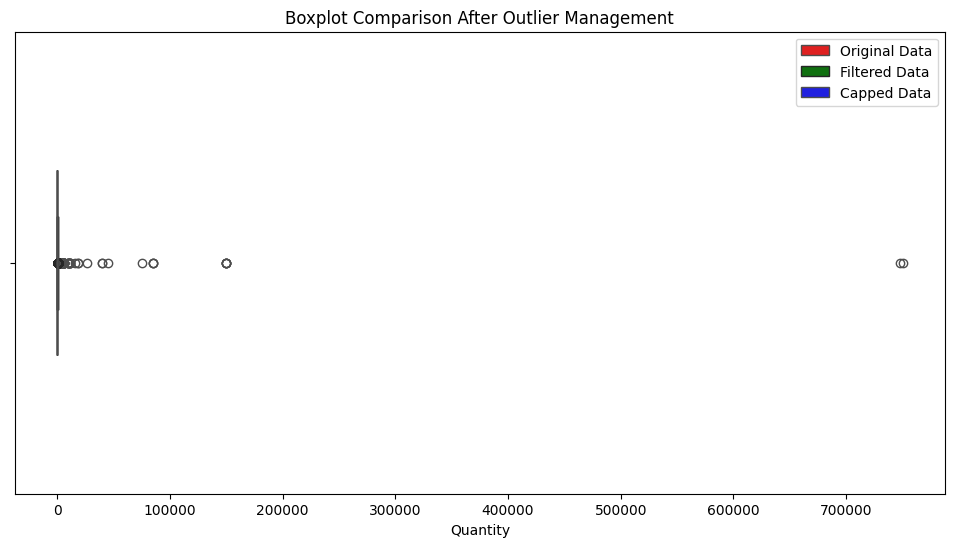

In [25]:
# Step 3: Visualize Data After Outlier Management
import matplotlib.pyplot as plt  # Importing the pyplot module from matplotlib
import seaborn as sns  # Importing seaborn for plotting

plt.figure(figsize=(12, 6))

# Create boxplots without the 'label' argument
sns.boxplot(x=numeric_column, data=data, color='red', width=0.4)
sns.boxplot(x=numeric_column, data=filtered_data, color='green', width=0.4)
sns.boxplot(x=numeric_column, data=capped_data, color='blue', width=0.4)

# Manually add a legend
plt.legend(labels=['Original Data', 'Filtered Data', 'Capped Data'])
plt.title("Boxplot Comparison After Outlier Management")
plt.show()

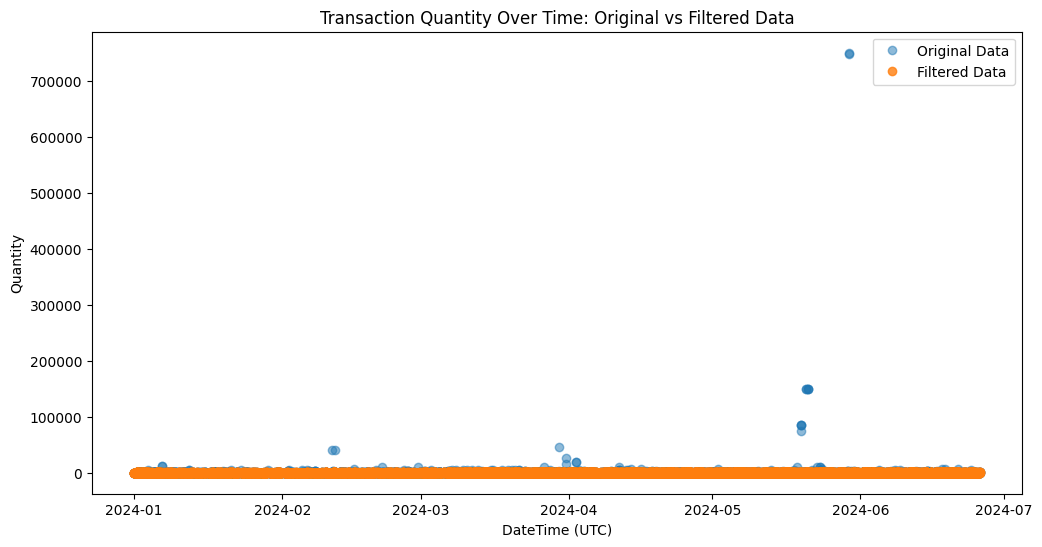

In [26]:
# Step 4: Trend Analysis Over Time
import matplotlib.pyplot as plt # Importing the necessary module

plt.figure(figsize=(12, 6))
plt.plot(data['DateTime (UTC)'], data[numeric_column], 'o', label='Original Data', alpha=0.5)
plt.plot(filtered_data['DateTime (UTC)'], filtered_data[numeric_column], 'o', label='Filtered Data', alpha=0.8)
plt.legend()
plt.title("Transaction Quantity Over Time: Original vs Filtered Data")
plt.xlabel("DateTime (UTC)")
plt.ylabel("Quantity")
plt.show()

In [27]:
# Step 5: Report Findings
print("\nReport:")
print("1. Original data showed significant skewness and outliers impacting trends and averages.")
print("2. Outlier management strategies were applied:")
print("   - Log Transformation: Reduced skewness while retaining all data points.")
print("   - Capping: Kept all data within reasonable bounds by replacing outliers with IQR bounds.")
print("   - Removal: Completely excluded outliers from the dataset.")
print("3. Verification ensured no significant distortion in data trends or metrics.")
print("4. The filtered dataset is recommended for use if outliers are deemed invalid.")
print("5. The capped dataset is recommended if retaining outlier values within a reasonable range is necessary.")
print("6. Log transformation is suitable for advanced statistical modeling.")
print("2. Outlier management strategies were applied:")
print("   - Log Transformation: Reduced skewness while retaining all data points.")
print("   - Capping: Kept all data within reasonable bounds by replacing outliers with IQR bounds.")
print("   - Removal: Completely excluded outliers from the dataset.")
print("3. Verification ensured no significant distortion in data trends or metrics.")
print("4. The filtered dataset is recommended for use if outliers are deemed invalid.")
print("5. The capped dataset is recommended if retaining outlier values within a reasonable range is necessary.")
print("6. Log transformation is suitable for advanced statistical modeling.")



Report:
1. Original data showed significant skewness and outliers impacting trends and averages.
2. Outlier management strategies were applied:
   - Log Transformation: Reduced skewness while retaining all data points.
   - Capping: Kept all data within reasonable bounds by replacing outliers with IQR bounds.
   - Removal: Completely excluded outliers from the dataset.
3. Verification ensured no significant distortion in data trends or metrics.
4. The filtered dataset is recommended for use if outliers are deemed invalid.
5. The capped dataset is recommended if retaining outlier values within a reasonable range is necessary.
6. Log transformation is suitable for advanced statistical modeling.
2. Outlier management strategies were applied:
   - Log Transformation: Reduced skewness while retaining all data points.
   - Capping: Kept all data within reasonable bounds by replacing outliers with IQR bounds.
   - Removal: Completely excluded outliers from the dataset.
3. Verification ensure

In [28]:
# Save Processed Data
filtered_data.to_csv('verified_filtered_data.csv', index=False)
capped_data.to_csv('verified_capped_data.csv', index=False)
data[['DateTime (UTC)', 'Log_Quantity']].to_csv('verified_log_transformed_data.csv', index=False)
print("\nProcessed datasets saved as 'verified_filtered_data.csv', 'verified_capped_data.csv', and 'verified_log_transformed_data.csv'.")


Processed datasets saved as 'verified_filtered_data.csv', 'verified_capped_data.csv', and 'verified_log_transformed_data.csv'.


**Analyze and visualize the total number of transactions over time (daily, weekly, or monthly) to identify patterns or trends.**

In [29]:
# Convert the 'DateTime (UTC)' column to datetime
data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])

In [30]:
# Convert 'DateTime (UTC)' to datetime objects if not already done
data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])

# Extract the date from 'DateTime (UTC)' and create a new 'Date' column
data['Date'] = data['DateTime (UTC)'].dt.date

# Now you can group by the 'Date' column
daily_transactions = data.groupby('Date').size()

C:\Users\dwara\AppData\Local\Temp\ipykernel_8324\592174729.py:17: FutureWarning: 'M' is deprecated and will be removed in a future version, please use 'ME' instead.
  monthly_transactions = data.groupby(pd.Grouper(key='DateTime (UTC)', freq='M')).size()


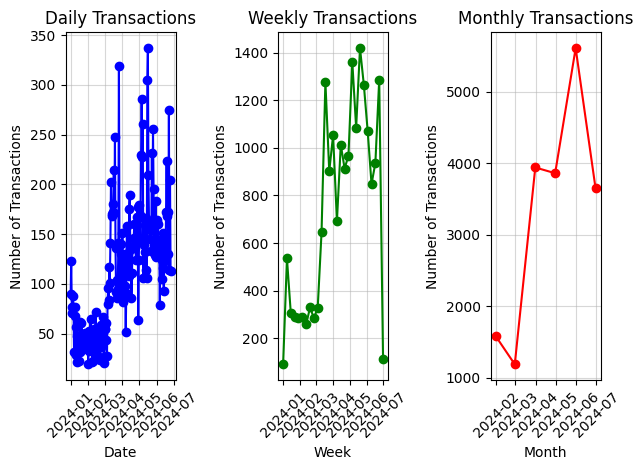

In [31]:
import pandas as pd
import matplotlib.pyplot as plt

# Convert 'DateTime (UTC)' to datetime objects if not already done
data['DateTime (UTC)'] = pd.to_datetime(data['DateTime (UTC)'])

# Extract the date from 'DateTime (UTC)' and create a new 'Date' column
data['Date'] = data['DateTime (UTC)'].dt.date

# Group by 'Date' for daily transactions
daily_transactions = data.groupby('Date').size()

# Resample to weekly frequency for weekly transactions
weekly_transactions = data.groupby(pd.Grouper(key='DateTime (UTC)', freq='W-MON')).size() # 'W-MON' starts the week on Monday

# Resample to monthly frequency for monthly transactions
monthly_transactions = data.groupby(pd.Grouper(key='DateTime (UTC)', freq='M')).size()


# Daily Transactions
plt.subplot(1, 3, 1)
plt.plot(daily_transactions.index, daily_transactions.values, marker='o', color='blue', label='Daily Transactions')
plt.title('Daily Transactions')
plt.xlabel('Date')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)


# Weekly Transactions
plt.subplot(1, 3, 2)
plt.plot(weekly_transactions.index, weekly_transactions.values, marker='o', color='green', label='Weekly Transactions')
plt.title('Weekly Transactions')
plt.xlabel('Week')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)


# Monthly Transactions
plt.subplot(1, 3, 3)
plt.plot(monthly_transactions.index, monthly_transactions.values, marker='o', color='red', label='Monthly Transactions')
plt.title('Monthly Transactions')
plt.xlabel('Month')
plt.ylabel('Number of Transactions')
plt.xticks(rotation=45)
plt.grid(alpha=0.5)

plt.tight_layout()
plt.show()

In [32]:
# Save aggregated results to CSV
daily_transactions.to_csv('daily_transactions.csv', header=['Transaction_Count'])
weekly_transactions.to_csv('weekly_transactions.csv', header=['Transaction_Count'])
monthly_transactions.to_csv('monthly_transactions.csv', header=['Transaction_Count'])

print("\nTransaction trends saved as 'daily_transactions.csv', 'weekly_transactions.csv', and 'monthly_transactions.csv'.")


Transaction trends saved as 'daily_transactions.csv', 'weekly_transactions.csv', and 'monthly_transactions.csv'.


**Examine the distribution of transaction quantities, including detecting skewness, peaks, and outliers. Create histograms or density plots to visualize this distribution.**

In [33]:
# Select the column of interest
quantity_column = 'Quantity'

# Step 1: Check for missing values
if data[quantity_column].isnull().sum() > 0:
    print(f"Missing values detected in {quantity_column}. Filling with median value.")
    data[quantity_column].fillna(data[quantity_column].median(), inplace=True)


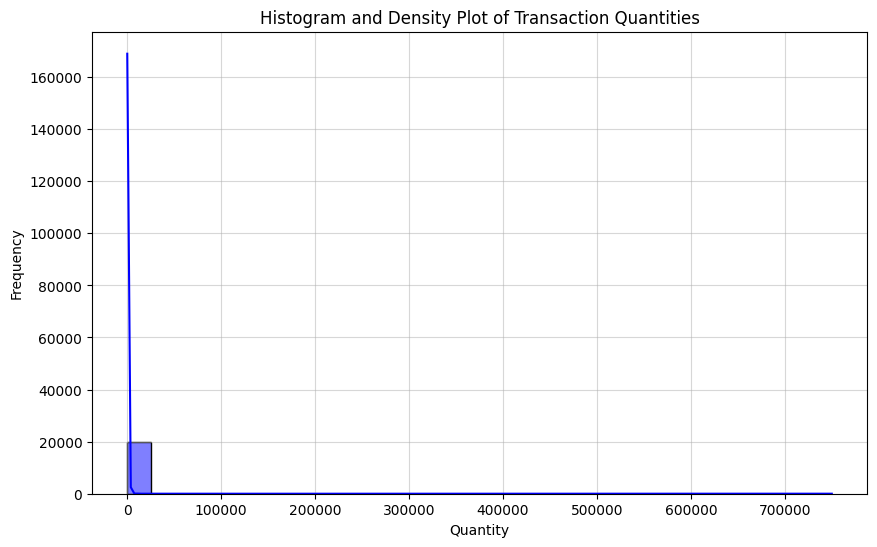

In [34]:
# Step 3: Visualize Distribution

# Histogram with Density Plot
plt.figure(figsize=(10, 6))
sns.histplot(data[quantity_column], kde=True, bins=30, color='blue')
plt.title('Histogram and Density Plot of Transaction Quantities')
plt.xlabel('Quantity')
plt.ylabel('Frequency')
plt.grid(alpha=0.5)
plt.show()


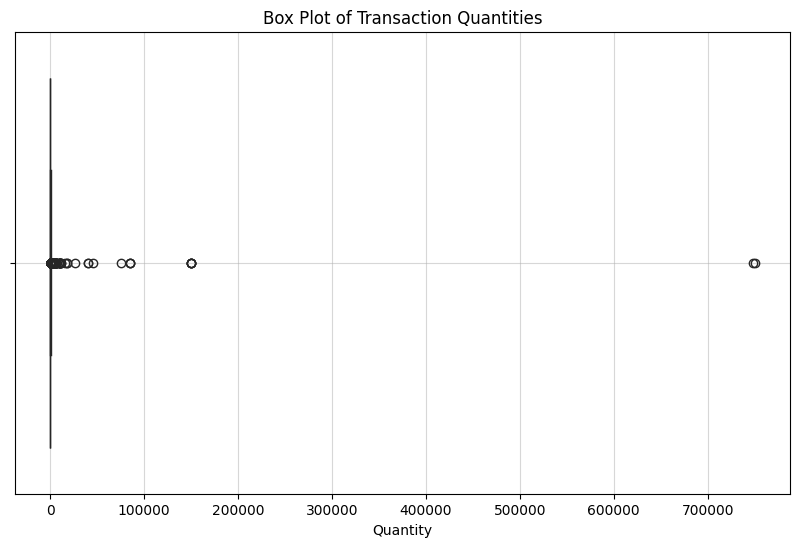

In [35]:
# Box Plot to Detect Outliers
plt.figure(figsize=(10, 6))
sns.boxplot(x=data[quantity_column], color='green')
plt.title('Box Plot of Transaction Quantities')
plt.xlabel('Quantity')
plt.grid(alpha=0.5)
plt.show()

In [36]:
# Step 4: Interpretation of Distribution
from scipy.stats import skew # Importing the skew function

if skew(data[quantity_column]) > 1:
    print("The data is positively skewed (right-skewed).")
elif skew(data[quantity_column]) < -1:
    print("The data is negatively skewed (left-skewed).")
else:
    print("The data has approximately symmetric distribution.")

The data is positively skewed (right-skewed).


In [37]:
# Step 5: Detect Outliers Using IQR
Q1 = data[quantity_column].quantile(0.25)
Q3 = data[quantity_column].quantile(0.75)
IQR = Q3 - Q1
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
outliers = data[(data[quantity_column] < lower_bound) | (data[quantity_column] > upper_bound)]

print(f"\nNumber of Outliers Detected: {len(outliers)}")
if len(outliers) > 0:
    print("Outlier Quantities:")
    print(outliers[quantity_column])



Number of Outliers Detected: 1689
Outlier Quantities:
42        816.500000
48        810.034476
50        810.034476
76        991.532433
77        991.532433
            ...     
19706     758.799883
19707    1720.940369
19712     746.305913
19815     746.300000
19833    1198.366157
Name: Quantity, Length: 1689, dtype: float64


In [38]:
# Step 6: Save Analysis Results
data[['DateTime (UTC)', quantity_column]].to_csv('transaction_quantity_analysis.csv', index=False)
outliers.to_csv('outliers.csv', index=False)

print("\nAnalysis results saved as 'transaction_quantity_analysis.csv' and 'outliers.csv'.")


Analysis results saved as 'transaction_quantity_analysis.csv' and 'outliers.csv'.


**Rank transactions based on the highest quantities recorded in the dataset and use bar charts to visualize the contributors to transaction quantities.**

In [39]:
# Select the column of interest
quantity_column = 'Quantity'

# Step 1: Rank Transactions by Quantity
data['Rank'] = data[quantity_column].rank(ascending=False, method='min')
ranked_data = data.sort_values(by=quantity_column, ascending=False)


In [40]:
# Step 2: Extract Top N Transactions (e.g., Top 10)
top_n = 10
top_transactions = ranked_data.head(top_n)

print(f"Top {top_n} Transactions by Quantity:")
print(top_transactions[['DateTime (UTC)', quantity_column, 'Rank']])

Top 10 Transactions by Quantity:
           DateTime (UTC)    Quantity  Rank
15829 2024-05-29 15:39:35  750000.000   1.0
15830 2024-05-29 15:40:47  748125.000   2.0
14239 2024-05-20 14:11:35  150000.000   3.0
14334 2024-05-21 01:11:11  150000.000   3.0
14336 2024-05-21 01:12:11  150000.000   3.0
14335 2024-05-21 01:11:35  150000.000   3.0
14238 2024-05-20 14:10:59  150000.000   3.0
14109 2024-05-19 16:12:47   84956.000   8.0
14108 2024-05-19 16:09:35   84956.000   8.0
14110 2024-05-19 16:14:23   84744.585  10.0


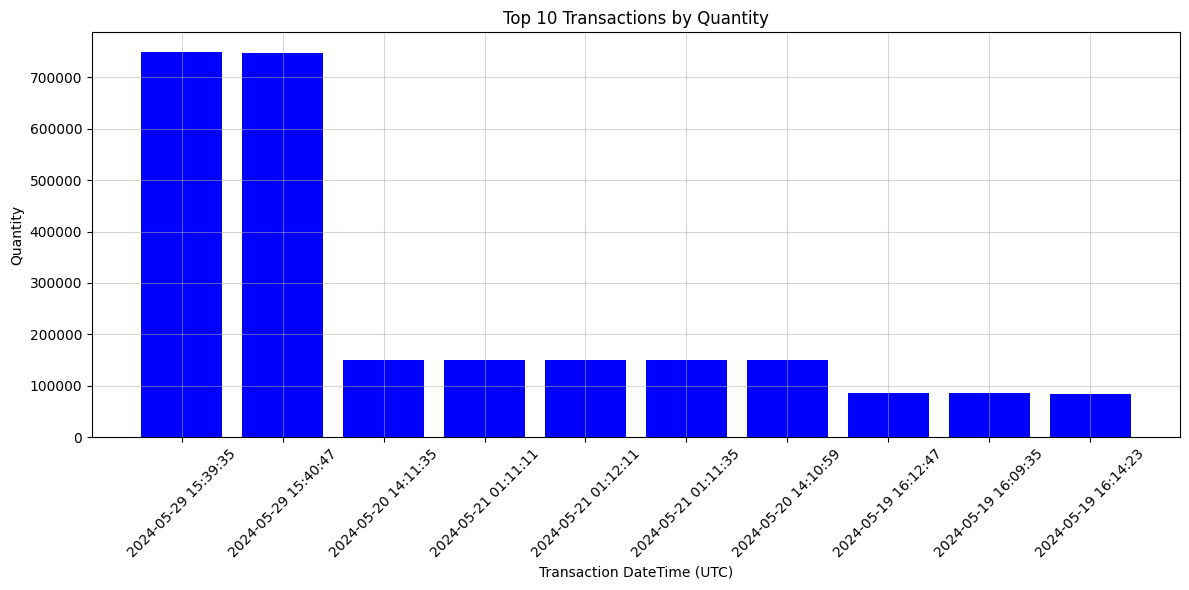

In [41]:
# Step 3: Visualization of Top Transactions
# Make sure matplotlib.pyplot is imported in this cell as well.
import matplotlib.pyplot as plt # Import the module

plt.figure(figsize=(12, 6))
plt.bar(top_transactions['DateTime (UTC)'].astype(str), top_transactions[quantity_column], color='blue')
plt.title(f"Top {top_n} Transactions by Quantity")
plt.xlabel("Transaction DateTime (UTC)")
plt.ylabel("Quantity")
plt.xticks(rotation=45)
plt.grid(alpha=0.5)
plt.tight_layout()
plt.show()

In [42]:

# Save Results
top_transactions.to_csv(f'top_{top_n}_transactions.csv', index=False)
print(f"\nTop {top_n} transactions saved as 'top_{top_n}_transactions.csv'.")


Top 10 transactions saved as 'top_10_transactions.csv'.


**Analyze the distribution of different transaction methods and determine their relative usage frequencies. Create pie charts or bar plots to represent the data.**

In [43]:
# Step 4: Analyze the distribution of transaction methods
method_counts = data['Method'].value_counts()

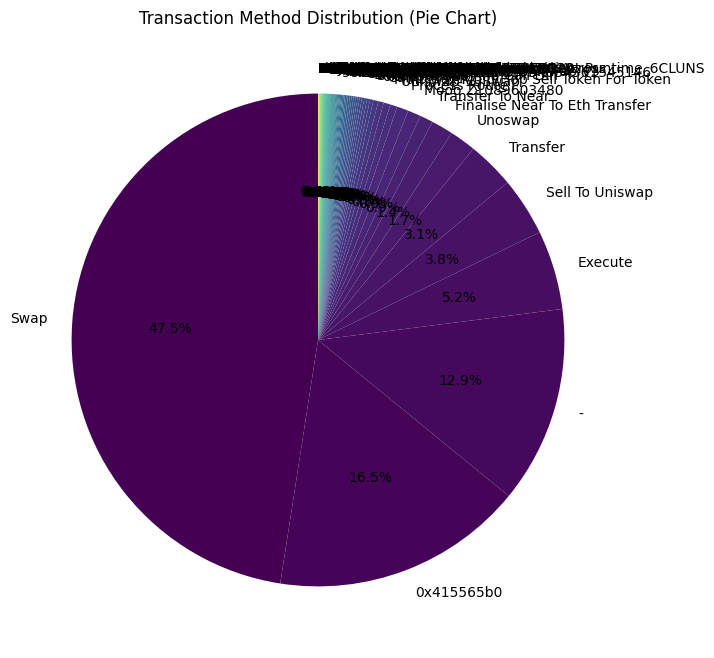

In [44]:
# Step 5: Create visualizations
# Pie Chart
plt.figure(figsize=(8, 8))
method_counts.plot.pie(autopct='%1.1f%%', startangle=90, cmap='viridis')
plt.title('Transaction Method Distribution (Pie Chart)')
plt.ylabel('')  # Remove the default ylabel
plt.show()

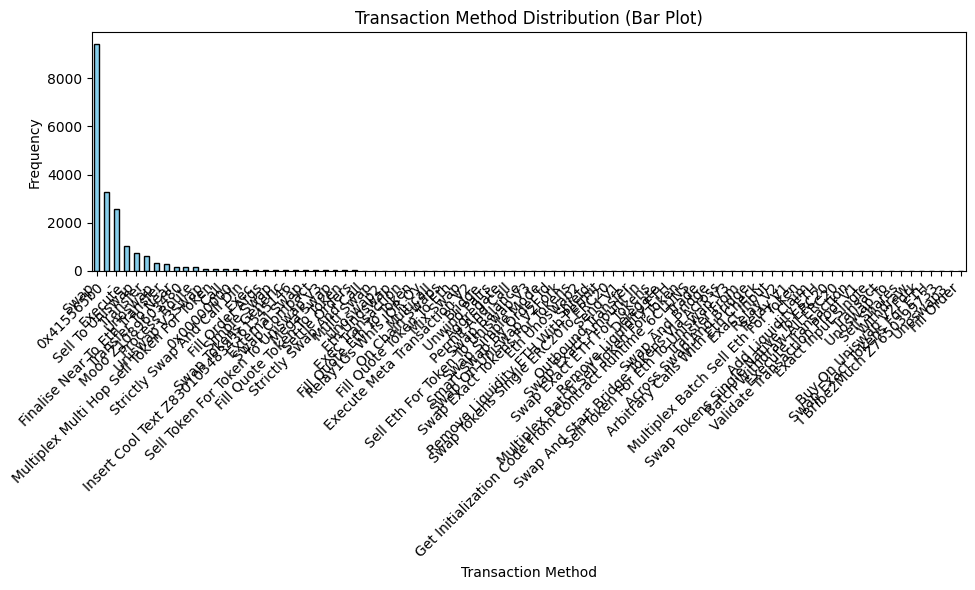

In [45]:
# Bar Plot
plt.figure(figsize=(10, 6))
method_counts.plot.bar(color='skyblue', edgecolor='black')
plt.title('Transaction Method Distribution (Bar Plot)')
plt.xlabel('Transaction Method')
plt.ylabel('Frequency')
plt.xticks(rotation=45, ha='right')
plt.tight_layout()
plt.show()